In [1]:
# Imports
import pandas as pd
from IPython.display import display
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 

# 1. Data

In [2]:
# a.  Load Country-data.csv into a pandas DataFrame and print out the header. 
#     Use pandas.DataFrame.describe to summarize the data.

data = pd.read_csv("C:/Users/miche/Downloads/UML_assignment1/Country-data.csv")

display(data.head())
display(data.describe())

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [3]:
# In a Markdown cell, explain the meaning of each column, make observations based on these statistics, and 
# discuss whether they provide useful insights. 

**Explanation:**
<pre>
Country: name of the country
child_mort: death of children under 5 years of age per 1000 live births
exports: exports of good and services per capita - given as % of GDP per capita
health: total health spending per capita - given as % of GDP per capita
imports: imports of good and services per capita - given as % of GDP per capita
income: net income per person
inflation: the measurement of the annual growth rate of the total GDP
life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
total_fer: the number of children that would be born to each woman if the current age-fertility rates remain the same
gdpp: the GDP per capita - claculated as the total GDP divided by the total population
</pre>
**Observations:**
<pre>
1. The counts shows us that there is an equal number of data samples for each feature in the dataset.
2. The mean indicates the average of the data, showing us that total fertility has the lowest average, while income has the highest average.
3. The std row tells us how the data is spread out - how far away it delves from the mean/average. In this dataset, we can see that total_fer is the least spread out, whereas income is the most spread out - indicating that there is a large difference between the lowest income, and the highest.
4. The min row tells us the lowest value in that column. We can see that the inflation column goes into the negative, indicating that for that country, their inflation rate has a decrease in prices in the economy.
5. The other useful rows is max. The lowest column is total_fer, while the highest is income.
6. Another observation is that total_fer has the lowest rate of all columns, while income is has highest rate.
</pre>

In [4]:
# b.  Use pandas.DataFrame.info to check if the entries are the correct data types and if there are any missing values. 
#     Use pandas.DataFrame.duplicated to check for duplicate entries. 
#     Clean the dataset so there are no missing values, duplicate rows, or incorrect data types.

display(data.info())
print("Duplicates: \n", data.duplicated().sum())
print("Nulls or Missing: \n", data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


None

Duplicates: 
 0
Nulls or Missing: 
 country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [5]:
# Document the changes and cleaning process in Markdown. 

**Explanation:**

I have made no changes to the dataset because there were no missing values, duplicates, or incorrect data types.
The data types are all correct because of the columns they belong to. For example, country has only strings, so the data type of object is correct; income and gdpp both contain only integers, and the rest of the columns are floats - which they should be. 

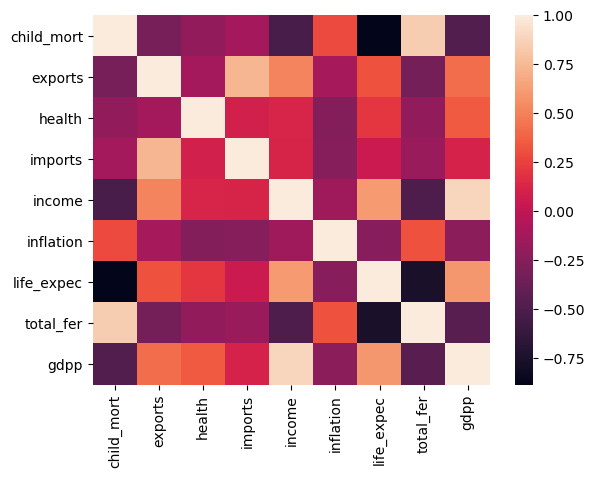

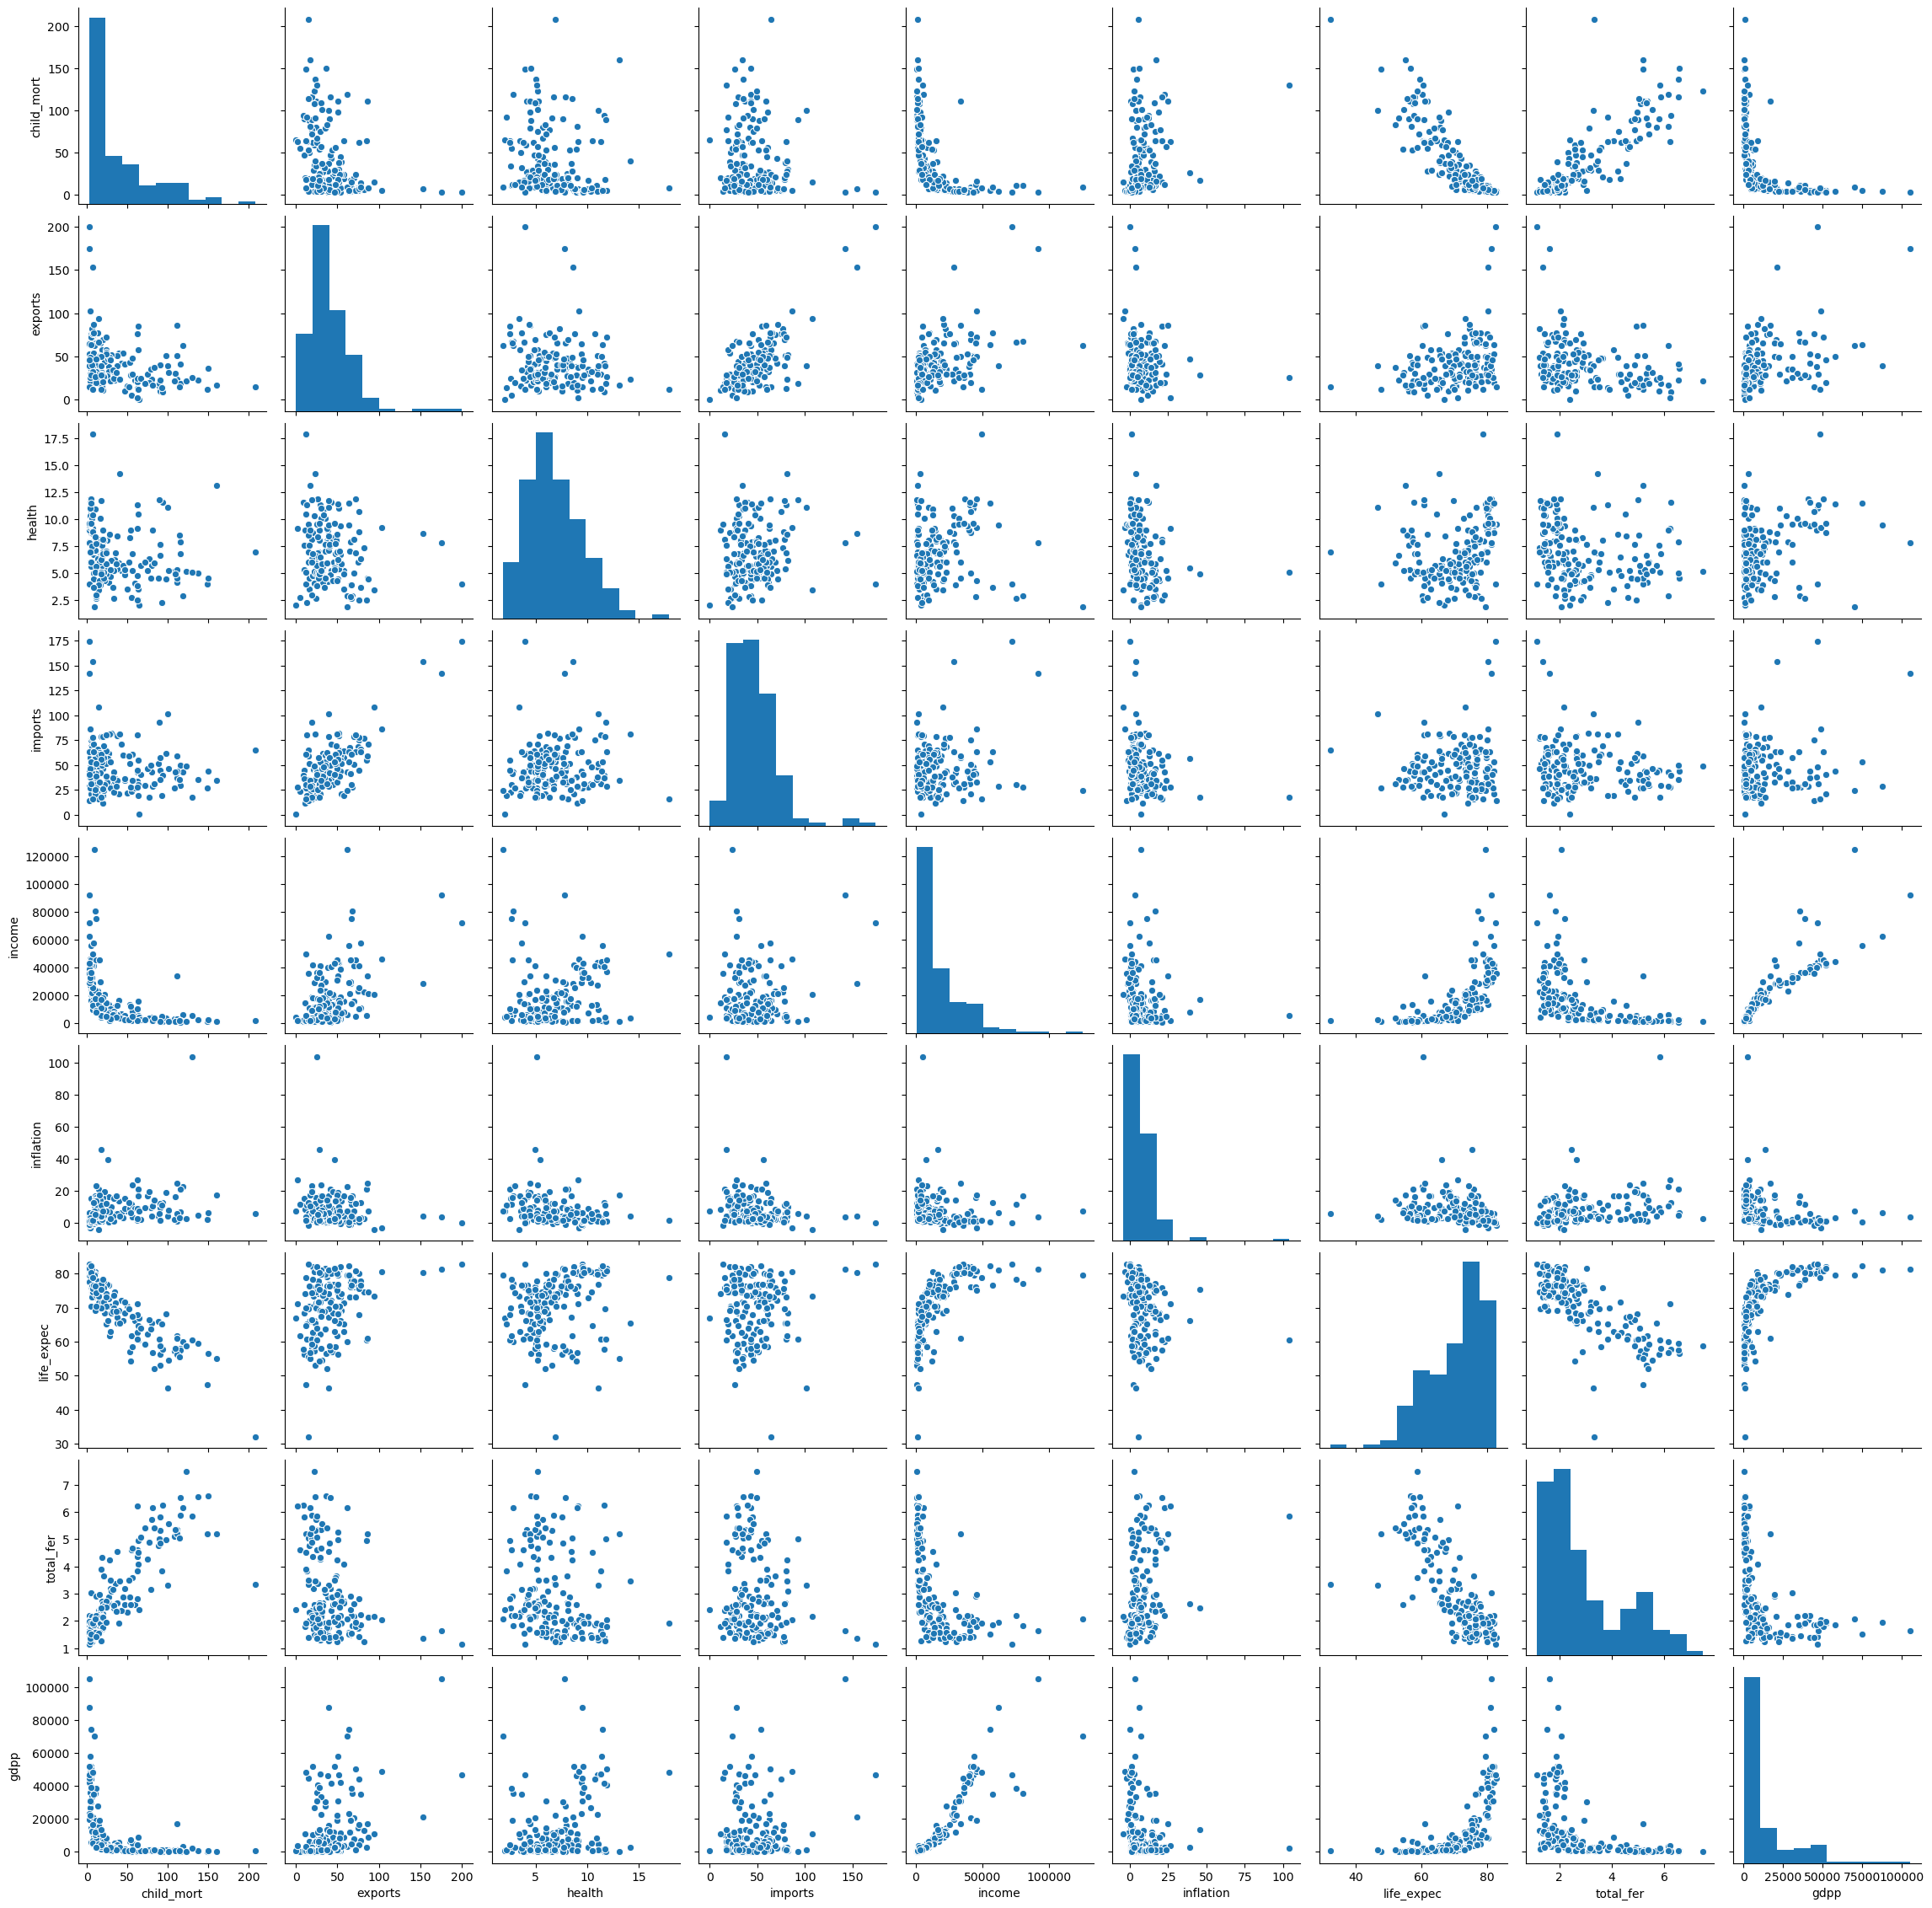

In [6]:
# c.  Drop the 'country' column and store it in a separate Dataframe. Use seaborn.heatmap to display the correlation matrix 
#     of the features and seaborn.pairplot to generate scatter plots and histograms.

label = data["country"]
features = data.drop(columns=["country"])
sns.heatmap(features.corr())
sns.pairplot(data=features)

In [7]:
# Record your observations in Markdown and discuss the insights gained from these visualizations.

**Explanation:**

We can see that the highest positive correlation are between the columns of child_mort and total_fer, income and gdpp, and, export and import. The strongest negative correlation are between the columns of child_mort and life_expec, and, life_expec and total_fer. 

# 2. Modeling

In [8]:
# a.  Use sklearn.preprocessing.StandardScaler to scale the data and print the transformed header. 
scaler = StandardScaler()
scaler = scaler.fit_transform(features)

scaled_df = pd.DataFrame(data=scaler)
scaled_df.head()

0         1         2         3         4         5         6  \
0  1.291532 -1.138280  0.279088 -0.082455 -0.808245  0.157336 -1.619092   
1 -0.538949 -0.479658 -0.097016  0.070837 -0.375369 -0.312347  0.647866   
2 -0.272833 -0.099122 -0.966073 -0.641762 -0.220844  0.789274  0.670423   
3  2.007808  0.775381 -1.448071 -0.165315 -0.585043  1.387054 -1.179234   
4 -0.695634  0.160668 -0.286894  0.497568  0.101732 -0.601749  0.704258   

          7         8  
0  1.902882 -0.679180  
1 -0.859973 -0.485623  
2 -0.038404 -0.465376  
3  2.128151 -0.516268  
4 -0.541946 -0.041817

Silhouette score for k=2: 0.2874
Silhouette score for k=3: 0.2833
Silhouette score for k=4: 0.3014
Silhouette score for k=5: 0.2993
Silhouette score for k=6: 0.2273
Silhouette score for k=7: 0.2491
Silhouette score for k=8: 0.2394
Silhouette score for k=9: 0.2306
Silhouette score for k=10: 0.1999


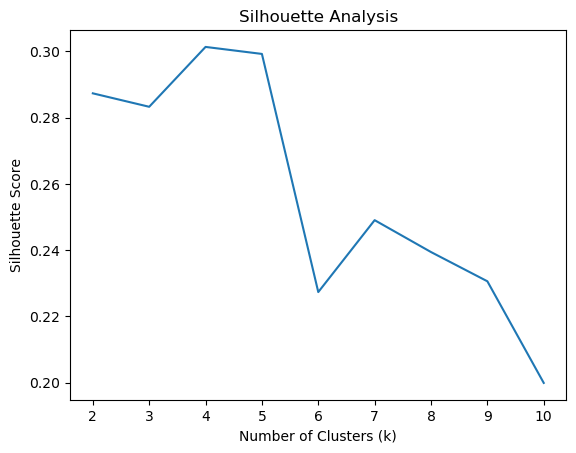

In [9]:
# b.  Use sklearn.cluster.KMeans to cluster the data. 
#     Try n_cluster values in the range [2, 10] and calculate the silhouette score for each. 
#     Create a plot of silhouette score versus number of clusters.

scores=[]
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    scores.append(score)
    print(f"Silhouette score for k={k}: {score:.4f}")
    
plt.plot(range(2,11), scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

In [10]:
# c.  Choose the best model

best_model = KMeans(n_clusters=4, random_state=42)
best_label = best_model.fit_predict(scaled_df)

In [11]:
# In a Markdown cell, justify the number of clusters selected for this use case. 
# Save the corresponding model as your best model. Remember that the silhouette score is not always a fully reliable metric. 
# It can provide guidance, but other criteria should also be considered when determining the best model. 

**Explanation:**
<pre>
Silhouette score for k=10: 0.1999
Silhouette score for k=11: 0.2061
Silhouette score for k=12: 0.2037
Silhouette score for k=13: 0.2054
Silhouette score for k=14: 0.2009
Silhouette score for k=15: 0.2144
Silhouette score for k=16: 0.1995
Silhouette score for k=17: 0.2123
Silhouette score for k=18: 0.1940
Silhouette score for k=19: 0.1856
Silhouette score for k=20: 0.2020
Silhouette score for k=21: 0.1802
Silhouette score for k=22: 0.1899
Silhouette score for k=23: 0.2002
Silhouette score for k=24: 0.1840
Silhouette score for k=25: 0.1842
Silhouette score for k=26: 0.1794
Silhouette score for k=27: 0.1997
Silhouette score for k=28: 0.1976
Silhouette score for k=29: 0.1979
Silhouette score for k=30: 0.1975
</pre>

After running multiple iterations as seen by the silhouette scores generated above, the best model comes to the one with 4 clusters. This model provided a silhouette score of 0.3014, while the rest had score of below that value.

The best model is the one with the four clusters. When using the silhouette score, it has an output between -1 and 1. The best output would be a score of 1, but this could also indicate that the model is overfitting. In this case, the best model is the one closest to 1, which would be the model with four clusters, or a silhouette score of 0.3014

# 3. Conclusion

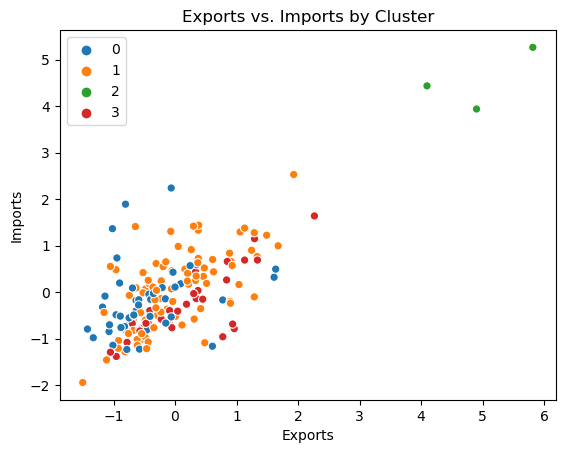

In [12]:
# a.  Based on your step 1 analysis, choose a pair of columns and generate a scatter plot of the data, 
#     coloring the points according to their assigned cluster.

sns.scatterplot(x=scaled_df[1], y=scaled_df[3], hue=best_label, palette='tab10')
plt.xlabel("Exports")
plt.ylabel("Imports")
plt.title("Exports vs. Imports by Cluster")
plt.show()

In [13]:
# Comment on the plot in Markdown.

**Explanation:**

This scatterplot shows the relationship between exports and imports across countries, with each colored by its assigned cluster.

This plot shows a strong positive correlation between Imports and Exports. In the graph, we can see that cluster two (green) is well distributed (with countries represented with both high imports and exports), while the other clusters are distributed around the origin/zero point. Another observation from this plot is that the orange/first cluster visually appears to have the most data points.

Based on the clustering, I can see that there are two very distinct groups to the naked eye, while there might be more distinct group to a clustering algorithm/model.

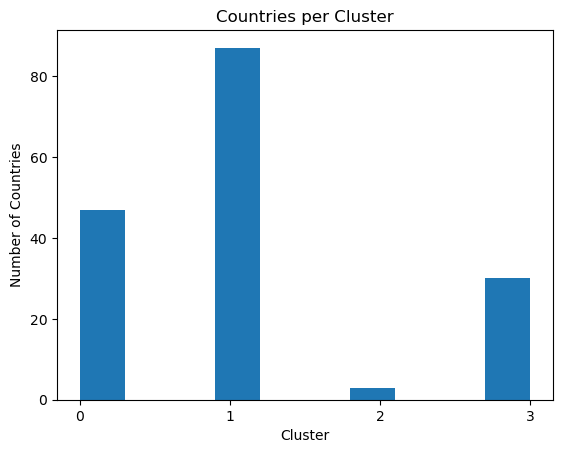

In [14]:
# b.  Generate a histogram showing the number of countries in each cluster

plt.hist(x=best_label)
plt.xticks([0,1,2,3])
plt.xlabel("Cluster")
plt.ylabel("Number of Countries")
plt.title("Countries per Cluster")
plt.show()

In [15]:
# Provide observations in Markdown, noting whether the cluster sizes make sense.

**Explanation:**

Based on the two previous graphs, the cluster sizes appear to be correct. From the scatterplot, orange/cluster 1 had the most data points, cluster 2 looked to have the least data points, while clusters 0 and 3 visually appeared to have around the number of data points between clusters 1 and 2.

The other observation I can make, is that the data is not distributed equally. For example, cluster 1 has over 80 data points, while clusters 0 and 3 have around 40, and cluster 2 is the lowest with under 10 data points. This could mean that based on the problem statement, the are less countries in need of aid in cluster 2 - or it could be the opposite, in which they are not in need of aid.

In [16]:
# c.  Print the country names in each cluster

for i in range(best_model.n_clusters):
    print(f"Cluster {i}:")
    print(label[best_label == i].tolist)

Cluster 0:
<bound method IndexOpsMixin.tolist of 0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                     

In [17]:
# Comment on whether the results are logical and rank the clusters from those needing the most aid to those needing the least. 
# Use quick research to build domain knowledge and verify whether the clustering results aligns with real-world conditions, 
# then summarize your findings.

**Explanation:**
<pre>
I used the HDI tool on the UNDP Human Development Reports website to determine how each cluster of countries fits in which order. Based on this tool, the order from the cluster needing the most aid to the least would be this:

Cluster 0 -> Cluster 1 -> Cluster 2 -> Cluster 3

I have attached the image of each cluster from this website for reference and I chose the country in each cluster randomly for this research.
I believe that the results were grouped logically because each cluster contains countries that have similar characteristics.
For example, cluster 0 contains mostly third world countries, while clusters 2 and 3 appear to have only first world countries.
</pre>

Cluster 0
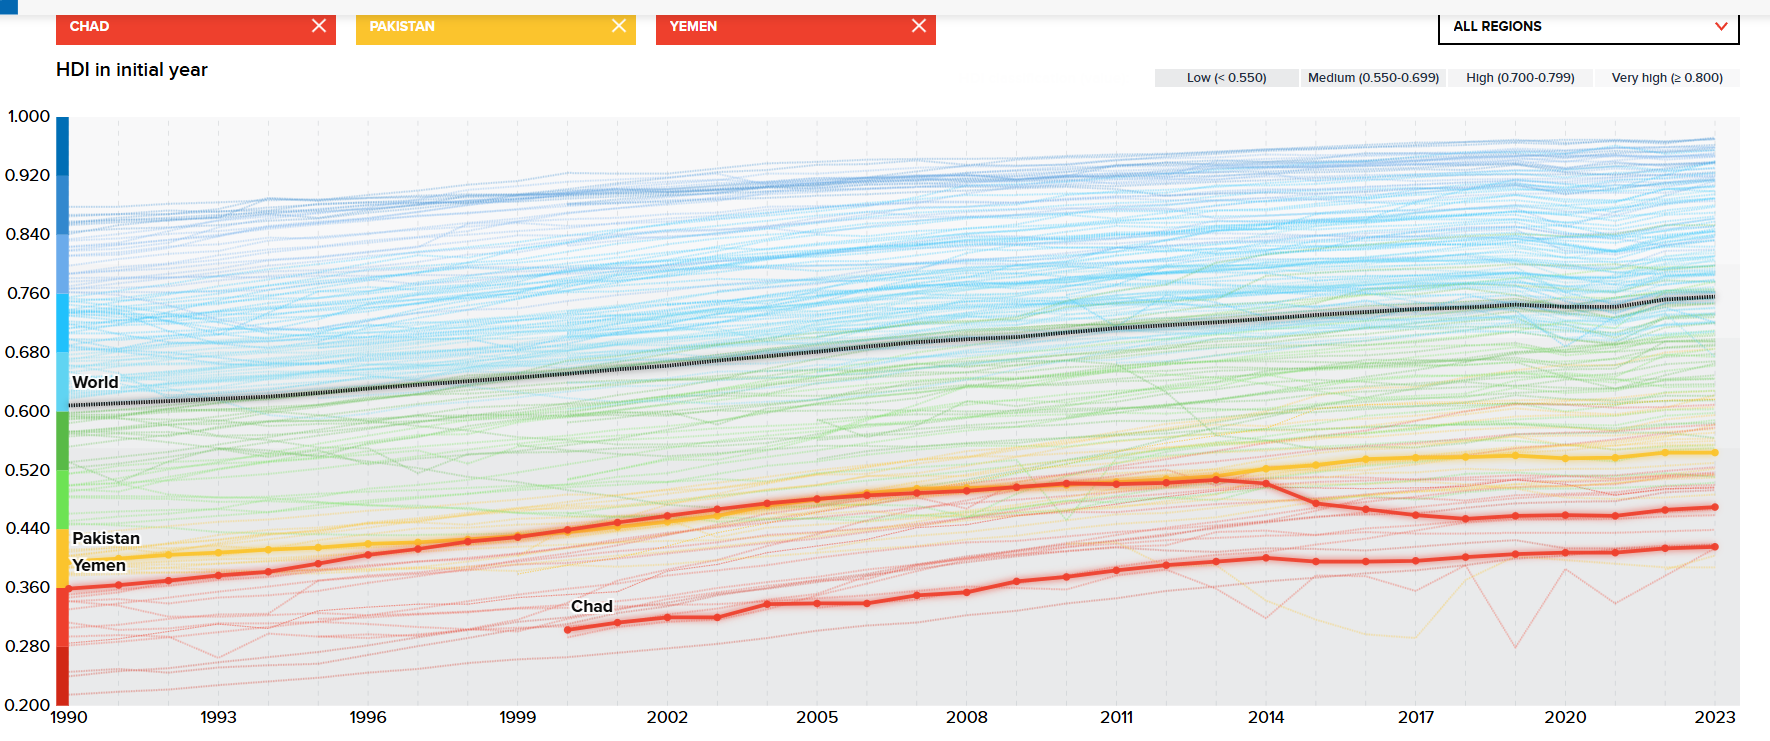
Cluster 1
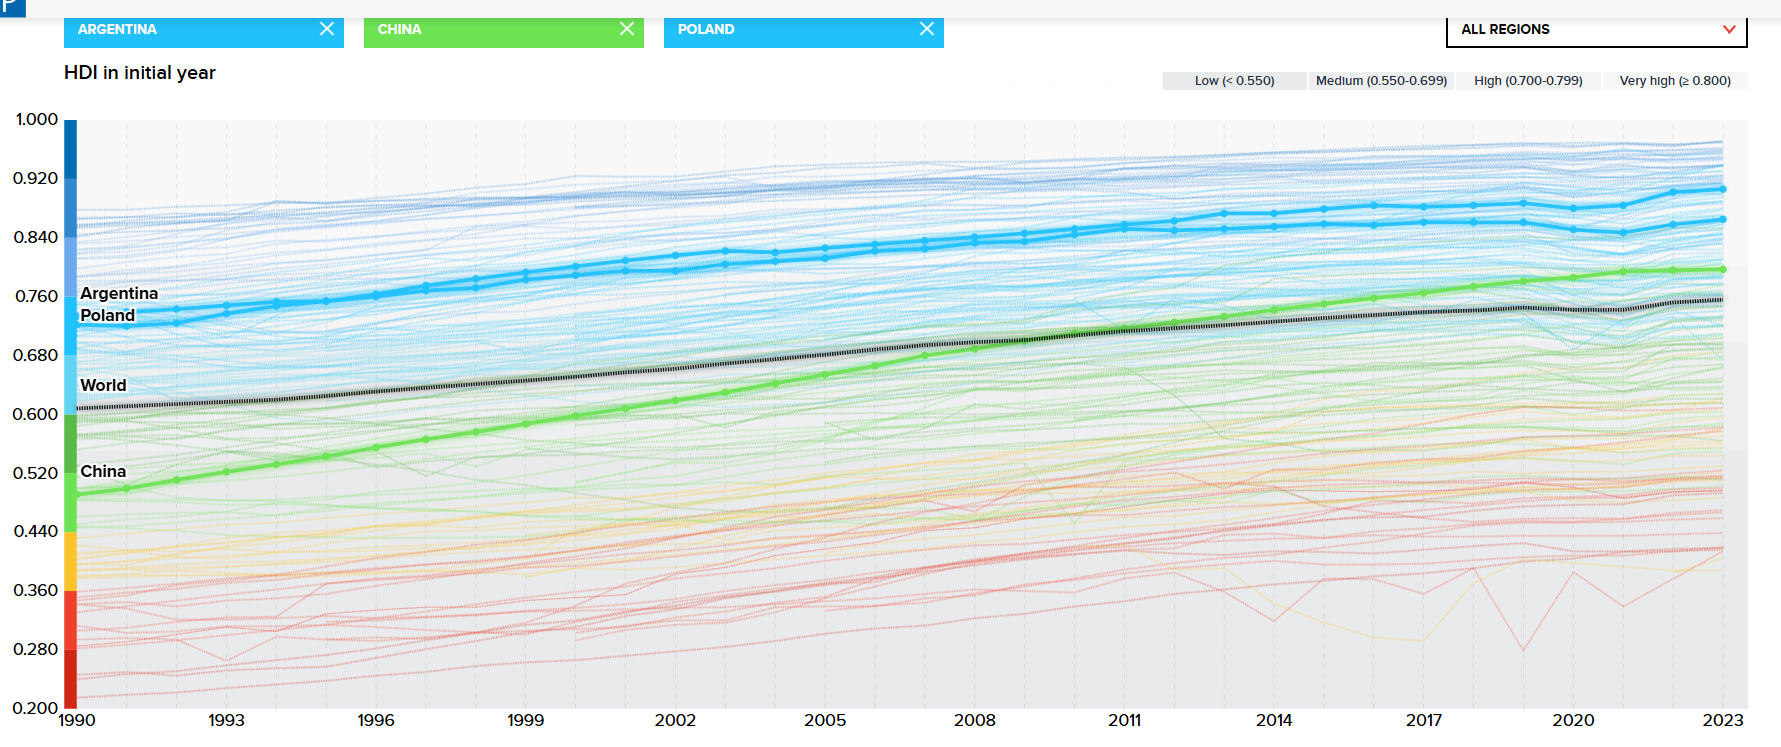
Cluster 2
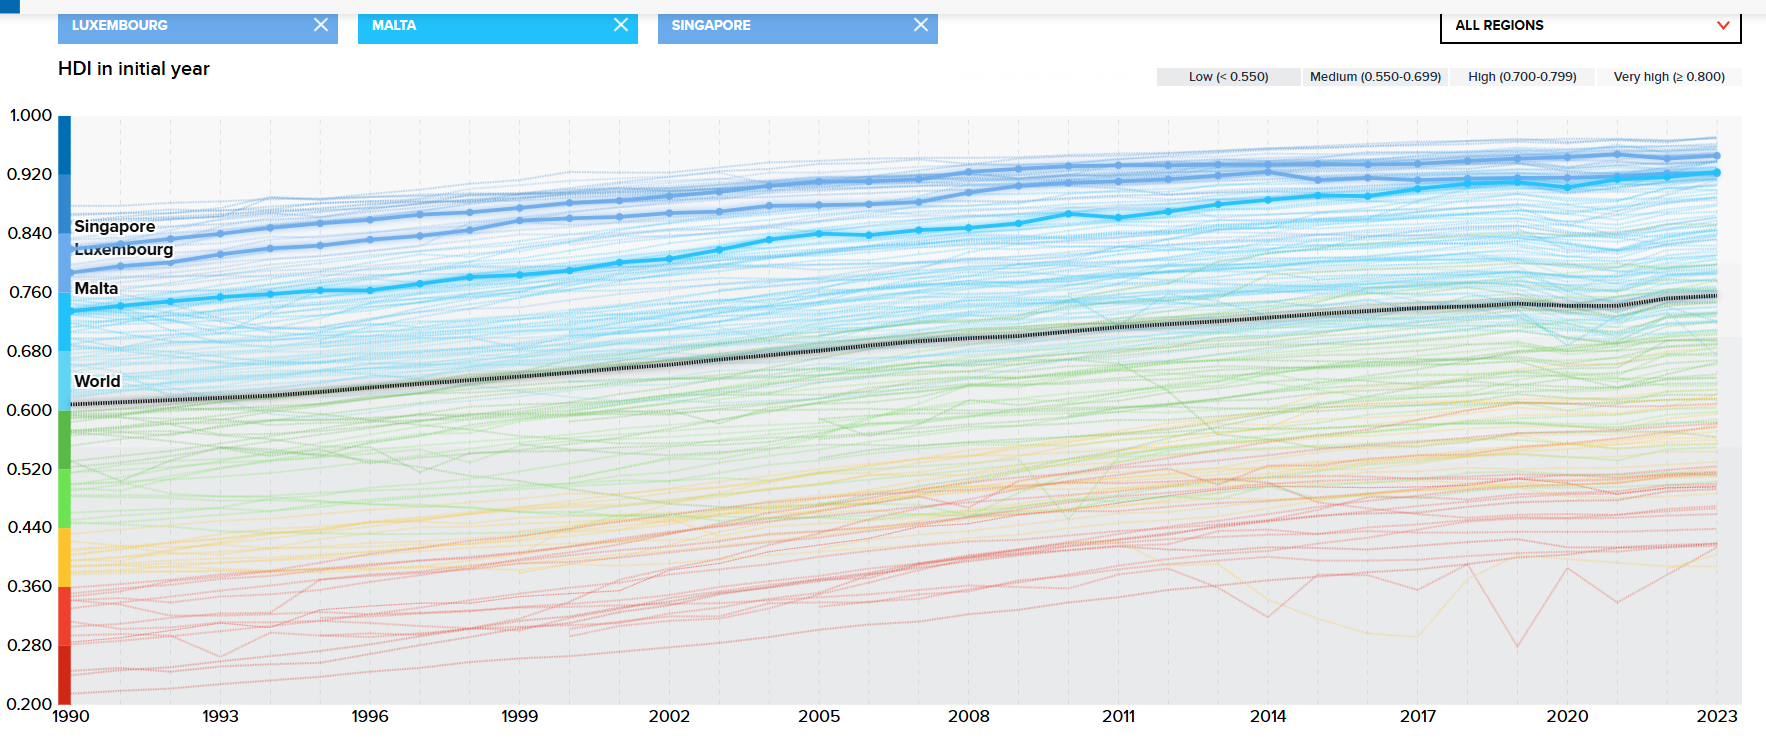
Cluster 3
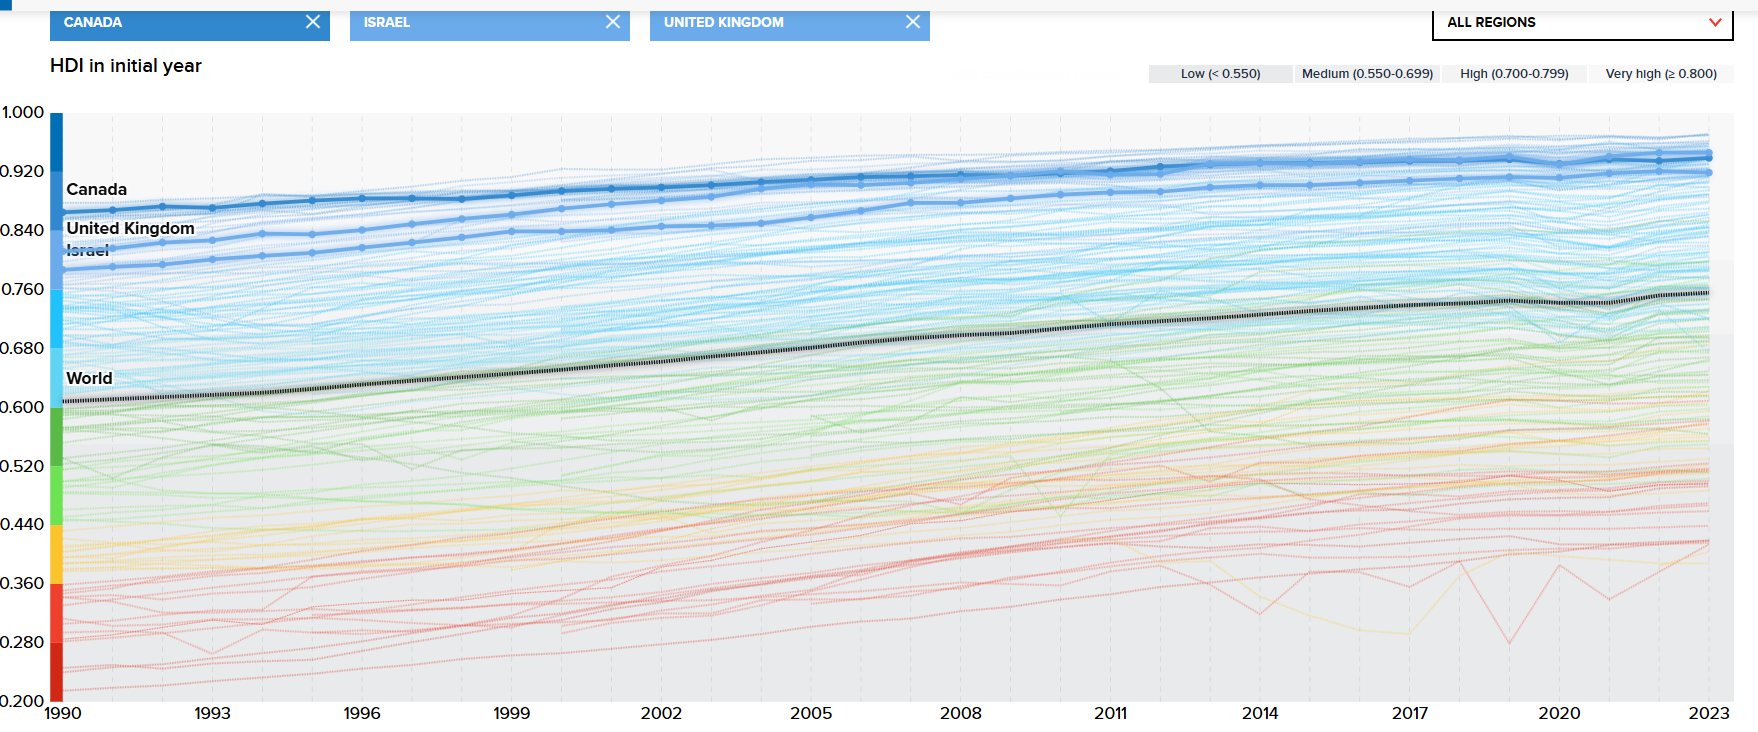

In [18]:
# d.  Describe which countries will receive funds and how much each will get, 
#     providing justification for your allocation strategy. 

**Explanation:**

Based on the clustering analysis and HDI research, cluster 0 contains countries with the lowest development indicators and is most in need of aid. These countries should be prioritized in HELP International's funding strategy.
Given the problem statement from HELP International, they have raised $100 million for allocation to countries in need. Based on the ranking I proposed, I think clusters should be distributed accordingly:

1. Cluster 0 - 70% of the funds
2. Cluster 1 - 25% of the funds
3. Cluster 2 - 2.5% of the funds
4. Cluster 3 - 2.5% of the funds

This allocation reflects the relative need of each cluster, with cluster 0 receiving the most funding, and clusters 2 and 3 receiveing least (given their first-world standing and HDI ranking). This strategy ensures that the majority of resources are directed toward countries where HELP International can make the greatest impact.